<a href="https://colab.research.google.com/github/Ishbah/hello_world/blob/main/breakout_function_for_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Breakout out function and backtester
Coded with help and inspiration from  - https://github.com/marvin-rubia/Stock-Breakouts-Backtester/blob/main/YahooFinance_StockBreakouts_Backtester.ipynb?short_path=026a8ee

https://python.plainenglish.io/coding-a-backtester-for-stock-breakouts-in-python-a21dc61c81ff

https://python.plainenglish.io/coding-stock-breakouts-in-python-a-step-by-step-guide-592211e36774



# **Import Libraries**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Breakout Function**

In [ ]:
def breakout_profit(tick,capital):

  tkr = yf.Ticker(tick)
  hist = tkr.history(interval="1d",period="max")

  hist.reset_index(inplace=True)

  prices = hist.drop(['Dividends','Stock Splits'],axis=1)

  prices['o2c'] = prices['Close'] - prices['Open']

  prices['o2c-20dmean'] = prices['o2c'].rolling(20).mean()

  prices['o2c-%f20dmean'] = 100*(prices['o2c'] - prices['o2c-20dmean'])/prices['o2c-20dmean']

  prices['maxo2c-prev10'] = prices['o2c'].rolling(10).max()

  prices['vol-20dmean'] = prices['Volume'].rolling(20).mean()

  prices['vol-%f20dmean'] = 100*(prices['Volume']-prices['vol-20dmean'])/prices['vol-20dmean']

  prices = prices[['Date','Open','High','Low','Close','o2c','o2c-20dmean','Volume','vol-20dmean','maxo2c-prev10','vol-%f20dmean','o2c-%f20dmean']]

  prices = prices.dropna()

  condition = (prices['o2c']>=0.0) & (prices['o2c'] == prices['maxo2c-prev10']) & (prices['o2c-%f20dmean'] >= 100.0) & (prices['vol-%f20dmean'] >= 50.0)
  breakouts = prices[condition]

  breakouts['Date'].tolist()
  breakouts_indices = breakouts.index.tolist()

  profits=[]

  for index in breakouts_indices:
    ten_r_post_bo = prices.iloc[index+1:index+11]

    hprice_10d = ten_r_post_bo['High'].max()

    lprice_10d = ten_r_post_bo['Low'].min()

    hprice_index = ten_r_post_bo[ten_r_post_bo['High'] == hprice_10d].index[0]

    lprice_index = ten_r_post_bo[ten_r_post_bo['Low'] == lprice_10d].index[0]

    bo_close = breakouts.loc[index,'Close']

    bo_open = breakouts.loc[index,'Open']


    if lprice_10d <= bo_open:
      if hprice_index < lprice_index:
        profit = round(100*(hprice_10d-bo_close)/bo_close,2)
        profits.append(profit)

      elif lprice_index <= hprice_index:
        profit = round(100*(bo_open-bo_close)/bo_close,2)
        profits.append(profit)

    else:
      profit = round(100*(hprice_10d-bo_close)/bo_close,2)
      profits.append(profit)

  wins = []
  breakevens = []
  losses = []
  for profit in profits:
    if profit > 0.0:
      wins.append(profit)
    elif profit == 0.0:
      breakevens.append(profit)
    elif profit < 0.0:
      losses.append(profit)

  win_rate = round(100*len(wins)/len(profits),2)
  breakeven_rate = round(100*len(breakevens)/len(profits),2)
  loss_rate = round(100*len(losses)/len(profits),2)

  avg_pos_profit = round(sum(wins)/len(wins),2)
  avg_neg_profit = round(sum(losses)/len(losses),2)

  # prices['year']=prices['Date'].dt.year
  # # Plot the closing prices
  # plt.figure(figsize=(10, 6))
  # plt.plot(prices.Date, prices['Close'], label='Closing Price', color='yellow')
  # plt.scatter(breakouts.Date, breakouts['Close'], label='Breakout', color='red', marker='^')

  # plt.title(f'{tick} Stock Price Over Time with Breakouts')
  # plt.xlabel('year')
  # plt.ylabel('Stock Price (USD)')

  # plt.legend()
  # plt.show()

  # sns.histplot(pd.Series(profits),bins=20)
  # plt.title(f"Distribution of Breakout Profits for {tick}")
  # plt.ylabel('Number of Breakouts')
  # plt.xlabel('Profit (%)')
  # plt.show()

  EV = round(((capital*avg_pos_profit*win_rate/10000) - (capital*avg_neg_profit*loss_rate/10000)),2)

  results = {
        'Ticker': tick,
        'Expectancy Value': EV,
        'Total Breakouts': len(profits),
        'Avg Positive Profit': avg_pos_profit,
        'Avg Negative Profit': avg_neg_profit,
        'Win Rate': win_rate,
        'Loss Rate': loss_rate,
        'Breakeven Rate': breakeven_rate
    }
  results_list.append(results)

# **Feed Stocks List** *from Investopedia Simulator Portfolio of iristoken13 aka me*

In [ ]:
# List to store results
results_list = []
skipped_tickers = []

# List of tickers
tickers = ['PM', 'SPOT', 'URI', 'MSFT', 'GOOG', 'MDB', 'FN', 'SNOW', 'DUOL', 'KKR', 'CNC', 'NBIX', 'MOH', 'EXPE', 'UBER', 'AAPL', 'JPM', 'ICE', 'GEHC', 'MA', 'DG', 'PFE', 'NKE', 'LH', 'AAME', 'DOW', 'PEP', 'LMT', 'KO', 'WMT', 'TSLA', 'SGOV', 'EIX', 'CBRE', 'PWR', 'BKR', 'V', 'ORCL', 'NVDA', 'IQV', 'MRK', 'JNJ', 'LLY', 'SPGI', 'BLK', 'RL', 'MAR', 'CMCSA', 'NFLX']

# Run the function for each ticker
for ticker in tickers:
    try:
        breakout_profit(ticker, 1000)
    except Exception as e:
        skipped_tickers.append(ticker)

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Display the results DataFrame
# print(results_df)
print(f"Total {len(skipped_tickers)} tickers skipped: {skipped_tickers}")

Total 12 tickers skipped: ['SPOT', 'FN', 'SNOW', 'NBIX', 'MOH', 'JPM', 'AAME', 'DOW', 'SGOV', 'NVDA', 'LLY', 'SPGI']


# ***Plot Comparitive Analysis***

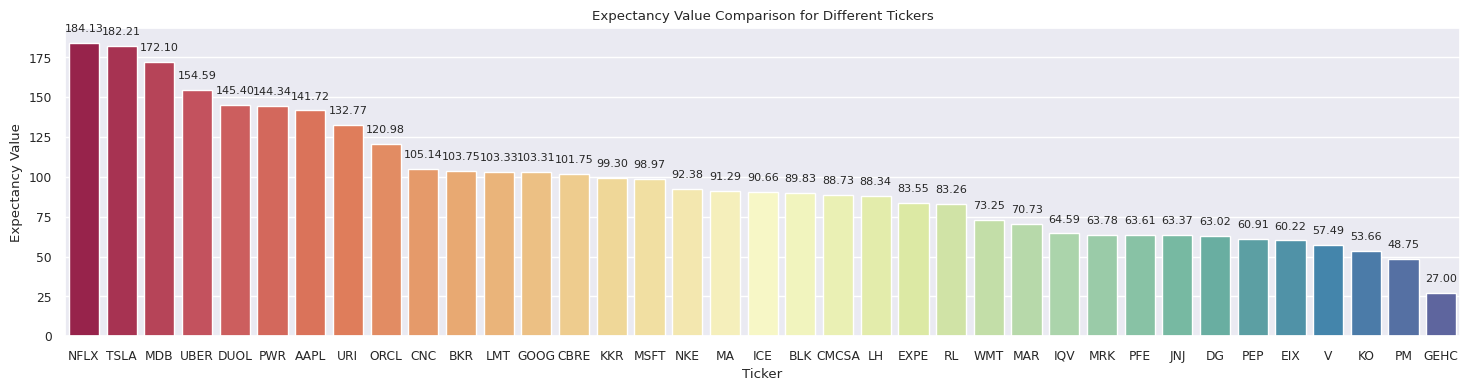

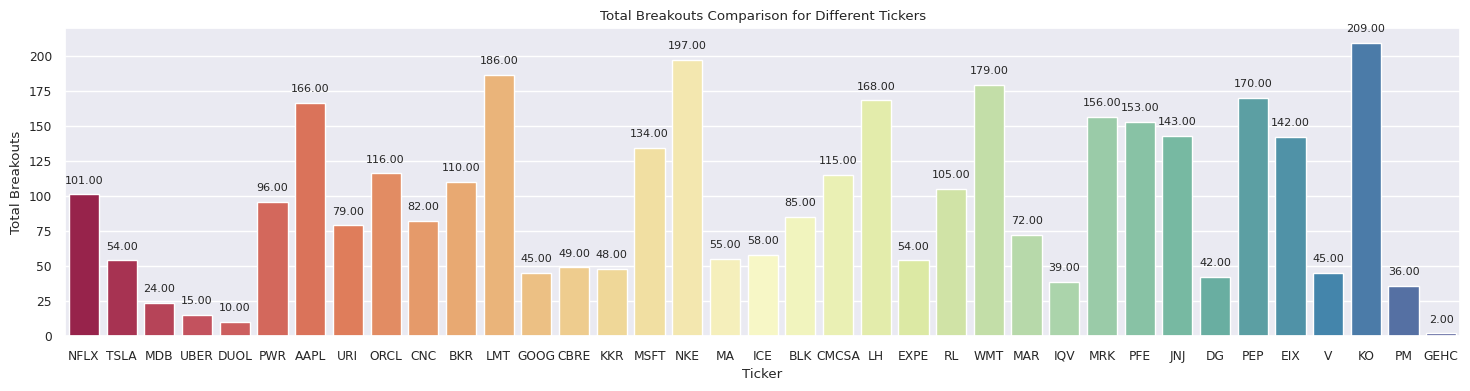

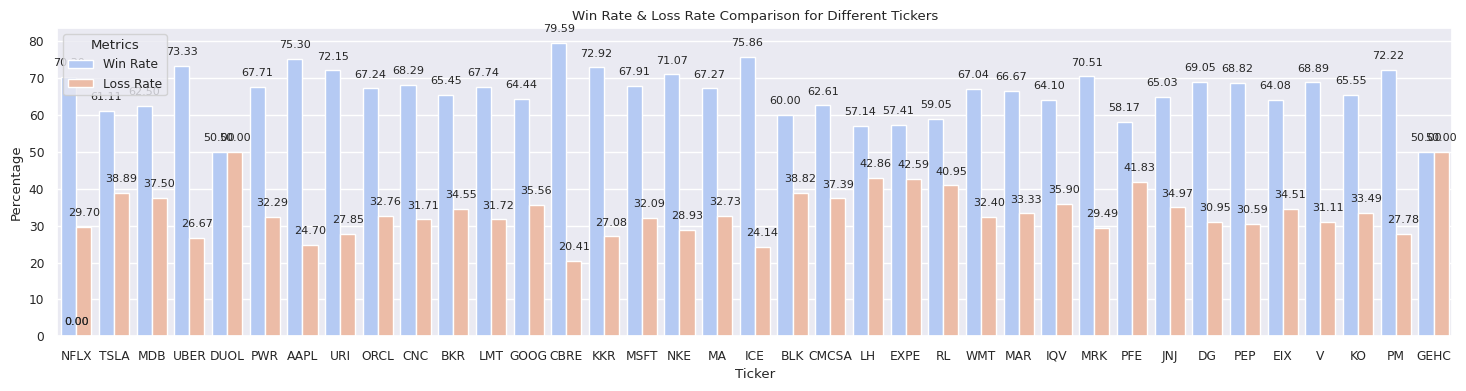

In [ ]:
results_df = results_df.sort_values(by=['Expectancy Value'], ascending=False)
# print(results_df)

# Set the style for seaborn
sns.set(style="whitegrid")
sns.set(font_scale=0.8)

# Plotting Expectancy Value
plt.figure(figsize=(18, 4))

barplot = sns.barplot(x='Ticker', y='Expectancy Value', hue='Ticker', data=results_df, palette='Spectral')

# Add labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Expectancy Value Comparison for Different Tickers')
plt.ylabel('Expectancy Value')
plt.show()

# Plotting Total Breakouts
plt.figure(figsize=(18, 4))
barplot = sns.barplot(x='Ticker', y='Total Breakouts', hue='Ticker', data=results_df, palette='Spectral')

# Add labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Total Breakouts Comparison for Different Tickers')
plt.ylabel('Total Breakouts')
plt.show()

# Plotting Win Rate, Loss Rate, and Breakeven Rate
metrics_df = results_df[['Ticker', 'Win Rate', 'Loss Rate']].melt('Ticker', var_name='Metrics', value_name='Percentage')

plt.figure(figsize=(18, 4))
barplot = sns.barplot(x='Ticker', y='Percentage', hue='Metrics', data=metrics_df, palette='coolwarm')

# Add labels to each bar
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Win Rate & Loss Rate Comparison for Different Tickers')
plt.ylabel('Percentage')
plt.show()